OBJETIVO DA ANÁLISE

Utilizar a análise fatorial para identificar os principais fatores que influenciam a atratividade e o valor das propriedades,
facilitando decisões de investimento, desenvolvimento e marketing.

#### IMPORTAÇÃO DE BIBLIOTECAS

#### BASE DE DADOS

Fonte: adaptado de https://www.kaggle.com/datasets/elakiricoder/jiffs-house-price-prediction-dataset

- land_size_sqm: Tamanho do terreno (m²).

- house_size_sqm: Tamanho da casa (m²).

- no_of_rooms: Número de quartos.

- no_of_bathrooms: Número de banheiros.

- distance_to_school: Distância até a escola (km).

- house_age: Idade da casa (anos).

- distance_to_supermarket_km: Distância até o supermercado (km).

- crime_rate_index: Índice de criminalidade.

- property_value: Valor da propriedade (unidade monetária).

In [23]:
import pandas as pd
import numpy as np
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
import pingouin as pg
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.io as pio
import plotly.graph_objects as go

#### IMPORTANDO O BANCO DE DADOS

In [2]:
casas = pd.read_excel("preco_casas.xlsx")


print(casas.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4954 entries, 0 to 4953
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   land_size_sqm               4954 non-null   int64  
 1   house_size_sqm              4954 non-null   int64  
 2   no_of_rooms                 4954 non-null   int64  
 3   no_of_bathrooms             4954 non-null   int64  
 4   distance_to_school          4954 non-null   float64
 5   house_age                   4954 non-null   int64  
 6   distance_to_supermarket_km  4954 non-null   float64
 7   crime_rate_index            4954 non-null   float64
 8   property_value              4954 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 348.5 KB
None


#### ESTATÍSTICA DESCRITIVAS DAS VARIÁVEIS

In [3]:
tab_desc = casas.describe()

display(tab_desc)

#Analisando as correlações de Pearson

# Matriz de correlações

corr = casas.corr()

display(corr)

,land_size_sqm,house_size_sqm,no_of_rooms,no_of_bathrooms,distance_to_school,house_age,distance_to_supermarket_km,crime_rate_index,property_value
count,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000
mean,250.131409,231.250908,3.788252,3.199839,3.454219,11.444691,3.508639,2.986110,201974.738999
std,103.131939,94.571642,1.585371,1.602300,2.007358,6.356991,1.991266,1.737742,90031.882219
min,100.000000,85.000000,1.000000,1.000000,0.100000,1.000000,0.100000,0.010000,32622.000000
25%,180.000000,165.000000,3.000000,2.000000,1.700000,6.000000,1.800000,1.470000,136777.000000
50%,235.000000,217.500000,4.000000,3.000000,3.400000,11.000000,3.500000,3.020000,194515.500000
75%,295.000000,274.000000,5.000000,4.000000,5.200000,17.000000,5.300000,4.490000,246590.000000
max,796.000000,760.000000,8.000000,9.000000,6.900000,22.000000,6.900000,5.990000,692086.000000


,land_size_sqm,house_size_sqm,no_of_rooms,no_of_bathrooms,distance_to_school,house_age,distance_to_supermarket_km,crime_rate_index,property_value
land_size_sqm,1.000000,0.991371,0.898252,0.679780,-0.011094,0.006547,0.004692,0.007752,0.973662
house_size_sqm,0.991371,1.000000,0.894753,0.677722,-0.010658,0.008198,0.001966,0.008044,0.964163
no_of_rooms,0.898252,0.894753,1.000000,0.710043,-0.006162,0.003455,-0.007287,0.014644,0.912155
no_of_bathrooms,0.679780,0.677722,0.710043,1.000000,-0.008322,0.000966,-0.002535,0.010655,0.686525
distance_to_school,-0.011094,-0.010658,-0.006162,-0.008322,1.000000,0.011519,0.010095,-0.002084,-0.072357
house_age,0.006547,0.008198,0.003455,0.000966,0.011519,1.000000,-0.002793,-0.000667,-0.037958
distance_to_supermarket_km,0.004692,0.001966,-0.007287,-0.002535,0.010095,-0.002793,1.000000,0.018026,-0.028634
crime_rate_index,0.007752,0.008044,0.014644,0.010655,-0.002084,-0.000667,0.018026,1.000000,-0.072801
property_value,0.973662,0.964163,0.912155,0.686525,-0.072357,-0.037958,-0.028634,-0.072801,1.000000


#### GRÁFICO DE CORRELAÇÃO

In [4]:
fig = go.Figure()

fig.add_trace(
    go.Heatmap(
        x = corr.columns,
        y = corr.index,
        z = np.array(corr),
        text=corr.values,
        texttemplate='%{text:.3f}',
        colorscale='viridis'))

fig.update_layout(
    height = 750,
    width = 750,
    yaxis=dict(autorange="reversed"))

fig.show()

In [6]:
#Selecionando as variáveis de interesse para a análise

# Vamos deixar o preço das casas de fora da análise fatorial! 

casas_pca = casas.drop(columns=['property_value'])

casas_pca

,land_size_sqm,house_size_sqm,no_of_rooms,no_of_bathrooms,distance_to_school,house_age,distance_to_supermarket_km,crime_rate_index
0,201,177,3,1,3.3,10,6.8,0.90
1,196,182,4,3,1.2,11,4.1,1.42
2,198,182,4,4,5.9,20,2.1,4.12
3,178,166,2,3,5.9,5,0.7,4.36
4,183,165,3,1,3.8,8,0.7,0.42
...,...,...,...,...,...,...,...,...
4949,297,261,4,4,2.9,20,4.1,3.99
4950,302,282,4,2,3.8,12,4.8,2.09
4951,153,147,3,4,3.3,7,4.7,3.98
4952,180,158,2,1,2.2,1,3.4,3.75


#### TESTE DE ESFERICIDADE DE BARTLETT

In [8]:
#Teste de Esfericidade de Bartlett
#gerar os testes para a matriz identidade


bartlett, p_value = calculate_bartlett_sphericity(casas_pca)

# print(f'Qui² Bartlett: {round(bartlett, 2)}')
# print(f'p-valor: {round(p_value, 4)}')

print(f'Qui² Bartlett: {round(bartlett, 2)}')

if p_value <= 0.05:
    print(f'p-valor: {round(p_value, 4)}')
    print("Rejeitamos H0, portanto ficamos com hipótese alternativa (matriz de correlações é diferente da matriz identidade")
else:
    print(f'p-valor: {round(p_value, 4)}')
    print("Aceitamos H0, portanto ficamos a hipótese nula (matriz de correlações é igual a matriz identidade")

Qui² Bartlett: 31857.46
p-valor: 0.0
Rejeitamos H0, portanto ficamos com hipótese alternativa (matriz de correlações é diferente da matriz identidade


In [9]:
#Definindo a PCA (procedimento inicial extraindo todos os fatores possíveis)

# o número 8 é quantidade de variaveis em casas_pca

fa = FactorAnalyzer(n_factors=8, method='principal', rotation=None).fit(casas_pca)

#%% Obtendo os autovalores

autovalores = fa.get_eigenvalues()[0]

print(autovalores)

# Soma dos autovalores

round(autovalores.sum(), 2)

[3.44078793 1.01989592 1.01155913 0.99164638 0.97675882 0.42231466
 0.128448   0.00858917]


8.0

In [11]:
#Critério de Kaiser (raiz latente)

# Temos 3 autovalores maiores do que 1

fa = FactorAnalyzer(n_factors=3, method='principal', rotation=None).fit(casas_pca)

#%% Eigenvalues, variâncias e variâncias acumuladas

autovalores_fatores = fa.get_factor_variance()

tabela_eigen = pd.DataFrame(autovalores_fatores)
tabela_eigen.columns = [f"Fator {i+1}" for i, v in enumerate(tabela_eigen.columns)]
tabela_eigen.index = ['Autovalor','Variância', 'Variância Acumulada']
tabela_eigen = tabela_eigen.T

print(tabela_eigen)

         Autovalor  Variância  Variância Acumulada
Fator 1   3.440788   0.430098             0.430098
Fator 2   1.019896   0.127487             0.557585
Fator 3   1.011559   0.126445             0.684030


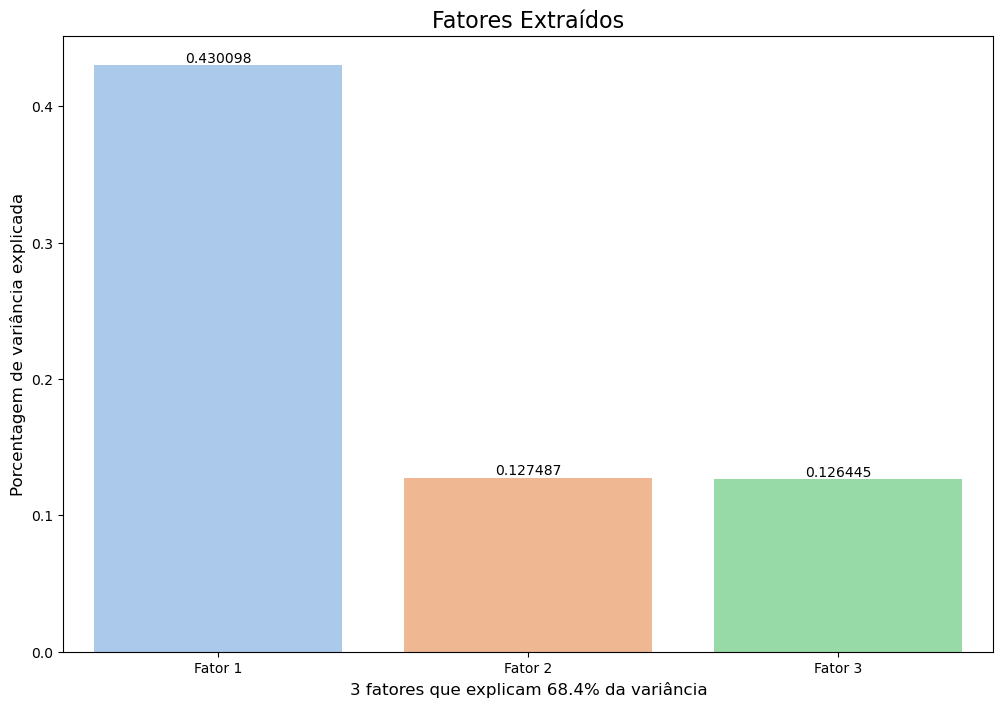

In [12]:
#Gráfico da variância acumulada dos componentes principais

plt.figure(figsize=(12,8))
ax = sns.barplot(x=tabela_eigen.index, y=tabela_eigen['Variância'], data=tabela_eigen, palette='pastel')
ax.bar_label(ax.containers[0])
plt.title("Fatores Extraídos", fontsize=16)
plt.xlabel(f"{tabela_eigen.shape[0]} fatores que explicam {round(tabela_eigen['Variância'].sum()*100,2)}% da variância", fontsize=12)
plt.ylabel("Porcentagem de variância explicada", fontsize=12)
plt.show()

In [13]:
#Determinando as cargas fatoriais

#as cargas fatoriais sao a correlacao das variaveis originais com os seus fatores extraidos

cargas_fatoriais = fa.loadings_

tabela_cargas = pd.DataFrame(cargas_fatoriais)
tabela_cargas.columns = [f"Fator {i+1}" for i, v in enumerate(tabela_cargas.columns)]
tabela_cargas.index = casas_pca.columns

print(tabela_cargas)

                             Fator 1   Fator 2   Fator 3
land_size_sqm               0.969318  0.000670  0.003416
house_size_sqm              0.967866 -0.000800  0.005045
no_of_rooms                 0.948705 -0.002536  0.002939
no_of_bathrooms             0.814810 -0.002453 -0.002870
distance_to_school         -0.013787  0.349991  0.642441
house_age                   0.007448  0.080374  0.692606
distance_to_supermarket_km -0.000987  0.720297 -0.113461
crime_rate_index            0.015520  0.610001 -0.325882


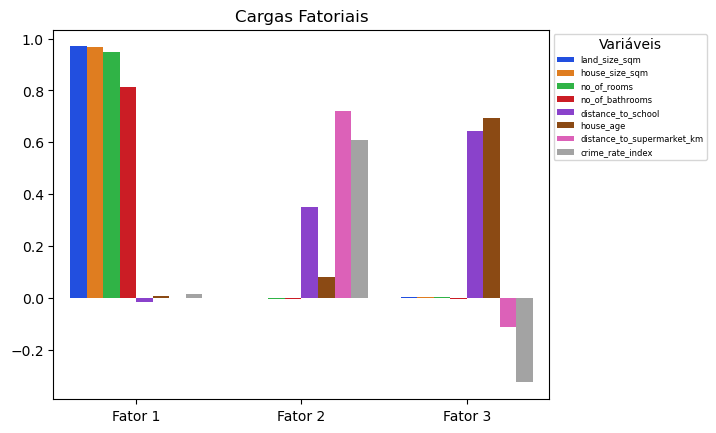

In [14]:
#Analisando as cargas fatoriais em cada fator extraído

tabela_cargas_graph = tabela_cargas.reset_index()
tabela_cargas_graph = tabela_cargas_graph.melt(id_vars='index')

sns.barplot(data=tabela_cargas_graph, x='variable', y='value', hue='index', palette='bright')
plt.legend(title='Variáveis', bbox_to_anchor=(1,1), fontsize = '6')
plt.title('Cargas Fatoriais', fontsize='12')
plt.xlabel(xlabel=None)
plt.ylabel(ylabel=None)
plt.show()

In [15]:
#Determinando as comunalidades

comunalidades = fa.get_communalities()

tabela_comunalidades = pd.DataFrame(comunalidades)
tabela_comunalidades.columns = ['Comunalidades']
tabela_comunalidades.index = casas_pca.columns

print(tabela_comunalidades)

                            Comunalidades
land_size_sqm                    0.939590
house_size_sqm                   0.936791
no_of_rooms                      0.900057
no_of_bathrooms                  0.663930
distance_to_school               0.535414
house_age                        0.486218
distance_to_supermarket_km       0.531702
crime_rate_index                 0.478541


In [16]:
#Extração dos fatores para as observações do banco de dados

fatores = pd.DataFrame(fa.transform(casas_pca))
fatores.columns =  [f"Fator {i+1}" for i, v in enumerate(fatores.columns)]

# Adicionando os fatores ao banco de dados

casas = pd.concat([casas.reset_index(drop=True), fatores], axis=1)

casas

,land_size_sqm,house_size_sqm,no_of_rooms,no_of_bathrooms,distance_to_school,house_age,distance_to_supermarket_km,crime_rate_index,property_value,Fator 1,Fator 2,Fator 3
0,201,177,3,1,3.3,10,6.8,0.90,165432,-0.763931,0.409791,-0.005071
1,196,182,4,3,1.2,11,4.1,1.42,187043,-0.286895,-0.720208,-0.507750
2,198,182,4,4,5.9,20,2.1,4.12,148658,-0.132644,0.413418,1.559236
3,178,166,2,3,5.9,5,0.7,4.36,123785,-0.734837,-0.181887,-0.025554
4,183,165,3,1,3.8,8,0.7,0.42,156470,-0.850848,-1.858475,0.369112
...,...,...,...,...,...,...,...,...,...,...,...,...
4949,297,261,4,4,2.9,20,4.1,3.99,235882,0.378174,0.565149,0.528827
4950,302,282,4,2,3.8,12,4.8,2.09,290995,0.149131,0.216979,0.269514
4951,153,147,3,4,3.3,7,4.7,3.98,106428,-0.533601,0.683343,-0.789444
4952,180,158,2,1,2.2,1,3.4,3.75,107579,-1.044735,-0.113250,-1.662989


In [17]:
#Identificando os scores fatoriais (pesos)

scores = fa.weights_

tabela_scores = pd.DataFrame(scores)
tabela_scores.columns = [f"Fator {i+1}" for i, v in enumerate(tabela_scores.columns)]
tabela_scores.index = casas_pca.columns

print(tabela_scores)

                             Fator 1   Fator 2   Fator 3
land_size_sqm               0.281714  0.000657  0.003377
house_size_sqm              0.281292 -0.000784  0.004987
no_of_rooms                 0.275723 -0.002487  0.002906
no_of_bathrooms             0.236809 -0.002405 -0.002837
distance_to_school         -0.004007  0.343163  0.635100
house_age                   0.002165  0.078806  0.684691
distance_to_supermarket_km -0.000287  0.706245 -0.112164
crime_rate_index            0.004510  0.598101 -0.322158


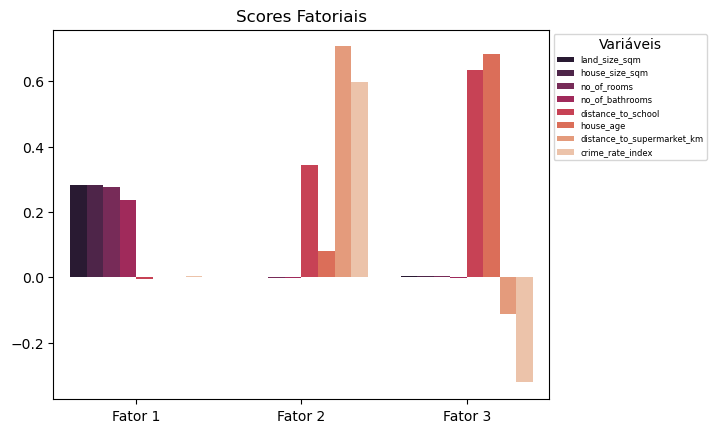

In [18]:
#Analisando os scores fatoriais em cada fator extraído

tabela_scores_graph = tabela_scores.reset_index()
tabela_scores_graph = tabela_scores_graph.melt(id_vars='index')

sns.barplot(data=tabela_scores_graph, x='variable', y='value', hue='index', palette='rocket')
plt.legend(title='Variáveis', bbox_to_anchor=(1,1), fontsize = '6')
plt.title('Scores Fatoriais', fontsize='12')
plt.xlabel(xlabel=None)
plt.ylabel(ylabel=None)
plt.show()

In [19]:
#consolidar os 3 fatores em uma medida única (soma ponderada)

casas['Ranking'] = 0

for index, item in enumerate(list(tabela_eigen.index)):
    variancia = tabela_eigen.loc[item]['Variância']

    casas['Ranking'] = casas['Ranking'] + casas[tabela_eigen.index[index]]*variancia

casas = casas.sort_values(by = 'Ranking', ascending = False)

casas

,land_size_sqm,house_size_sqm,no_of_rooms,no_of_bathrooms,distance_to_school,house_age,distance_to_supermarket_km,crime_rate_index,property_value,Fator 1,Fator 2,Fator 3,Ranking
1272,773,760,8,9,3.5,16,6.5,4.08,576789,4.595015,1.485529,0.176303,2.187987
2165,727,642,8,9,6.7,15,4.1,5.64,549116,4.116004,1.706603,0.919358,2.104105
1700,788,737,8,7,4.2,12,6.8,3.70,609407,4.268170,1.534514,0.023299,2.034310
3245,767,678,8,9,5.8,12,4.6,0.06,692086,4.318585,-0.227890,1.321044,1.995403
2080,749,634,8,6,6.6,21,1.9,3.98,548638,3.707133,0.416845,1.971345,1.896841
...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,101,96,1,1,1.2,4,2.2,1.03,80127,-1.622788,-1.607367,-1.092035,-1.040959
4214,107,103,1,1,1.1,6,1.4,0.23,87009,-1.586654,-2.158828,-0.714283,-1.047958
1910,100,85,1,1,1.6,6,0.7,0.29,87039,-1.660063,-2.300881,-0.528943,-1.074205
3676,106,103,1,1,0.8,3,1.3,1.67,88692,-1.586057,-1.787117,-1.393747,-1.086227


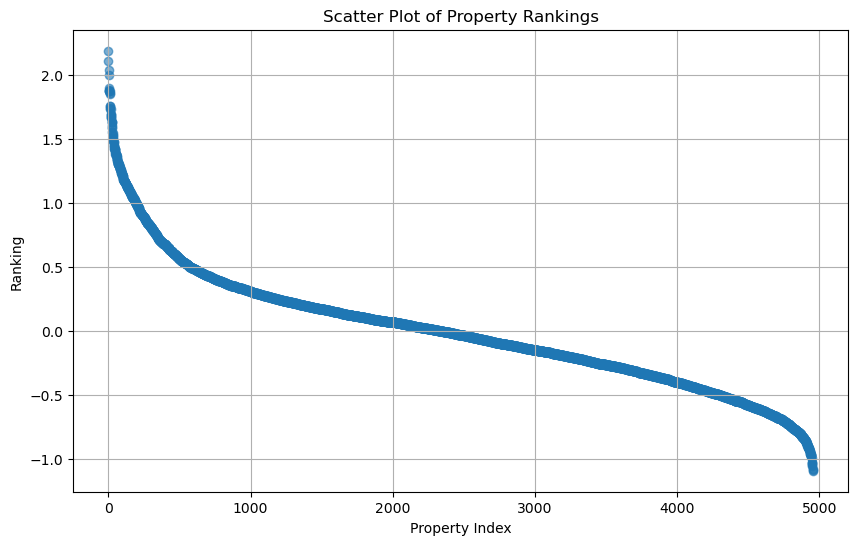

In [20]:
# Create a scatter plot for the 'Ranking' column
plt.figure(figsize=(10, 6))
plt.scatter(range(len(casas)), casas['Ranking'], alpha=0.6)
plt.title('Scatter Plot of Property Rankings')
plt.xlabel('Property Index')
plt.ylabel('Ranking')
plt.grid(True)
plt.show()

#### ANÁLISE RANKINGS

1 - Fator 1: Correlação muito alta com o ranking (0.922). Isso sugere que o principal fator que contribui para a classificação dos imóveis é fortemente relacionado ao tamanho do terreno e da casa, além do número de quartos e banheiros.

2 - Tamanho do Terreno e da Casa, Número de Quartos e Banheiros:

- land_size_sqm (0.896)
- house_size_sqm (0.894)
- no_of_rooms (0.876)
- no_of_bathrooms (0.750)

Estes fatores estão fortemente correlacionados com o ranking, indicando que imóveis maiores com mais quartos e banheiros tendem a ter rankings melhores.

3 - Valor da Propriedade:

- property_value (0.849)
Existe uma forte correlação positiva entre o valor da propriedade e o ranking, sugerindo que imóveis com valores mais altos tendem a ter rankings melhores.

4 - Distância e Idade da Casa:

- distance_to_school (0.257)
- house_age (0.217)
- distance_to_supermarket_km (0.165)
- crime_rate_index (0.093)

Estas variáveis têm correlações menores com o ranking, indicando que enquanto elas influenciam, elas não são os principais determinantes da classificação.

#### INSIGHTS E DECISÕES

1 - Foco em Propriedades com Maior Espaço:

- Investidores e compradores podem focar em propriedades com maiores tamanhos de terrenos e casas, assim como maior número de quartos e banheiros, para garantir um bom ranking.

2 - Valorização do Imóvel:

- Propriedades com altos rankings tendem a ter maiores valores de mercado. Portanto, melhorias que aumentam o tamanho útil ou a quantidade de quartos e banheiros podem ser estratégias eficazes para aumentar o valor do imóvel.

3 - Prioridade para Localizações e Segurança:

- Embora a influência seja menor, a proximidade a escolas, supermercados e baixa taxa de criminalidade ainda são fatores importantes a serem considerados na escolha de um imóvel.

4 - Estratégias de Renovação:

- Melhorias na infraestrutura (como adicionar quartos e banheiros) podem ser priorizadas para elevar o ranking de um imóvel.

5 - Desenvolvimento e Planejamento Urbano:

- As cidades podem utilizar essas informações para direcionar o desenvolvimento urbano, incentivando construções que maximizem os espaços habitacionais e melhorem as infraestruturas locais.

Esses insights podem orientar investidores, desenvolvedores e planejadores urbanos na tomada de decisões mais informadas e estratégicas.